In [11]:
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import os
from sklearn import metrics
import seaborn as sns
from timeit import default_timer as timer

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0


In [13]:
f1 = []
log_loss = []  
accuracy = []
class PredictionCallback(tf.keras.callbacks.Callback):    
  def on_epoch_end(self, epoch, logs={}):
    y_pred = self.model.predict(x_test)
    index = []
    for array in y_pred:
        for i in range(len(array)):
            if max(array, key=lambda x: x) == array[i]:
                index.append(i)

    # Evaluate the model on training and testing data
    f1.append(metrics.f1_score(y_test, index , average='macro'))
    log_loss.append((metrics.log_loss(y_test, y_pred)))
    accuracy.append(metrics.balanced_accuracy_score(y_test, index))

In [14]:
class Model_Timer(tf.keras.callbacks.Callback):
    def __init__(self):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

In [15]:
model = Sequential([
    (SimpleRNN(50, return_sequences=True)),
    (SimpleRNN(50, return_sequences=True)),
    (SimpleRNN(50,  return_sequences=True)),
    (SimpleRNN(50)),
    Dense(10,activation="softmax")
])
cb = Model_Timer()
# Compile the model
model.compile(optimizer=tf.optimizers.legacy.Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["MeanAbsoluteError","RootMeanSquaredError", "MeanSquaredError"])
model.fit(x_train, y_train, batch_size=8, epochs=10, validation_data=(x_test, y_test),callbacks=[PredictionCallback(), cb])

Epoch 1/10
7500/7500 [==============================] - 48s 6ms/step - loss: 0.4564 - mean_absolute_error: 4.3739 - root_mean_squared_error: 5.2318 - mean_squared_error: 27.3721 - val_loss: 0.4115 - val_mean_absolute_error: 4.3630 - val_root_mean_squared_error: 5.2271 - val_mean_squared_error: 27.3224
Epoch 2/10
7500/7500 [==============================] - 47s 6ms/step - loss: 0.3136 - mean_absolute_error: 4.3739 - root_mean_squared_error: 5.2326 - mean_squared_error: 27.3805 - val_loss: 0.2324 - val_mean_absolute_error: 4.3630 - val_root_mean_squared_error: 5.2277 - val_mean_squared_error: 27.3293
Epoch 3/10
7500/7500 [==============================] - 47s 6ms/step - loss: 0.3152 - mean_absolute_error: 4.3739 - root_mean_squared_error: 5.2327 - mean_squared_error: 27.3807 - val_loss: 0.3062 - val_mean_absolute_error: 4.3630 - val_root_mean_squared_error: 5.2274 - val_mean_squared_error: 27.3258
Epoch 4/10
7500/7500 [==============================] - 47s 6ms/step - loss: 0.3124 - mean_

In [16]:
time_took_to_run = sum(cb.logs)
time_took_to_run

481.62369370716624

In [22]:
y_pred = model.predict(x_test)
index = []
for array in y_pred:
    for i in range(len(array)):
        if max(array, key=lambda x: x) == array[i]:
            index.append(i)
cm = metrics.multilabel_confusion_matrix(y_test, index)
print("Accuracy (validation): " + str(metrics.accuracy_score(y_test, index)))
print(f"F1 Score: {metrics.f1_score(y_test, index , average='macro')}")
print(f"Log Loss: {metrics.log_loss(y_test, y_pred)}")
print(f"Confusion Matrix: {metrics.multilabel_confusion_matrix(y_test, index)}")
print("Max-Min Diff: " + str(max(accuracy)-min(accuracy)))

313/313 [==============================] - 1s 2ms/step
Accuracy (validation): 0.8063
F1 Score: 0.8029494873583435
Log Loss: 0.6103989578868347
Confusion Matrix: [[[8775  245]
  [ 148  832]]

 [[8811   54]
  [ 108 1027]]

 [[8772  196]
  [ 147  885]]

 [[8774  216]
  [ 234  776]]

 [[8830  188]
  [ 310  672]]

 [[8962  146]
  [ 325  567]]

 [[8831  211]
  [ 134  824]]

 [[8873   99]
  [ 149  879]]

 [[8832  194]
  [ 190  784]]

 [[8603  388]
  [ 192  817]]]
Max-Min Diff: 0.12860744725448792


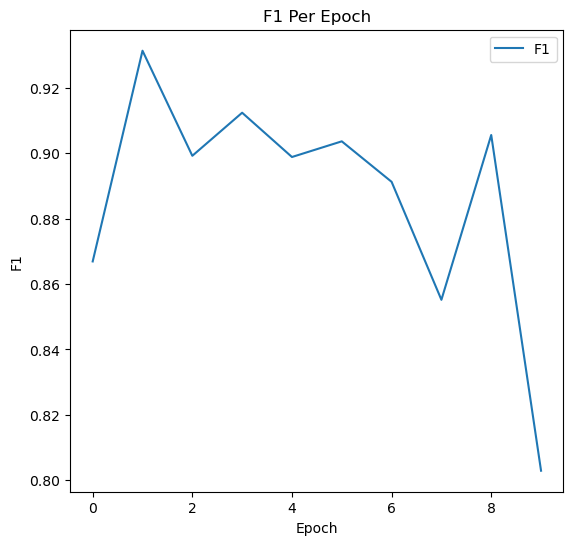

In [18]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.plot(f1, label="F1")
plt.title('F1 Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('F1')
plt.legend()

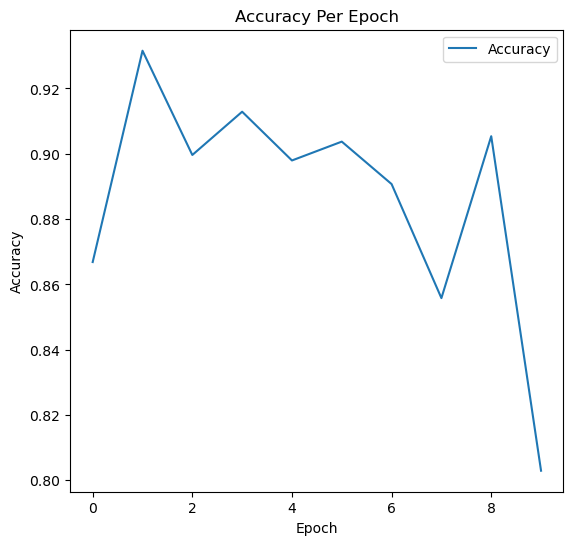

In [19]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label="Accuracy")
plt.title('Accuracy Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

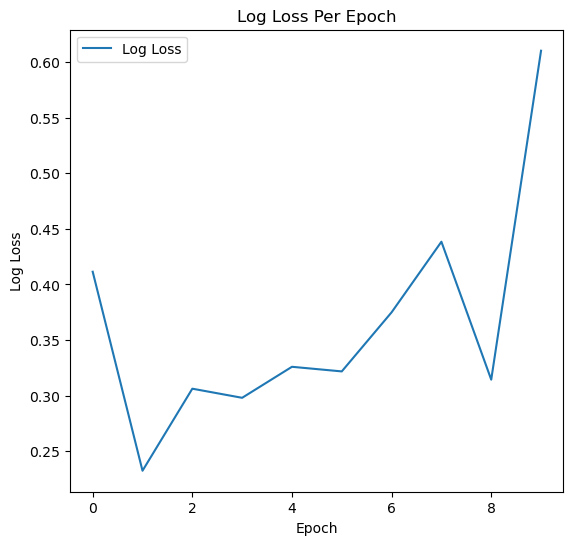

In [20]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.plot(log_loss, label="Log Loss")
plt.title('Log Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()

[[ 832    0    1    1    5    4   77    1   59    0]
 [   2 1027   31   36    6    2    6   10   12    3]
 [  19    3  885   28    7    9   31   18   29    3]
 [  19    3   69  776    2   91    5   19   20    6]
 [   8    6    2    5  672    9   27    4    6  243]
 [  54   12   11  100   16  567   29    5   49   49]
 [  97    1    8    0   20    3  824    0    3    2]
 [   2   12   22   23   21    0    1  879    3   65]
 [  42   12   51   13    8    8   30    9  784   17]
 [   2    5    1   10  103   20    5   33   13  817]]


<Axes: >

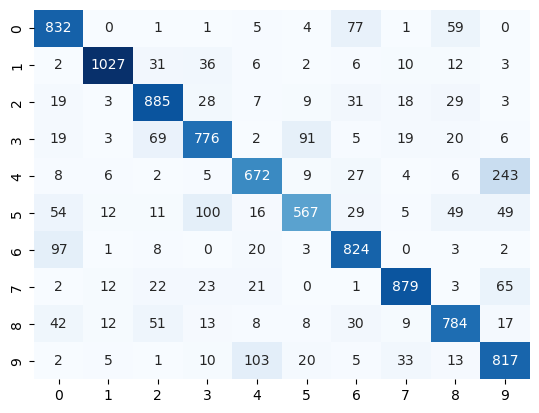

In [21]:
cm = metrics.confusion_matrix(y_test, index)
print(cm)
sns.heatmap(cm, cmap="Blues", cbar=False, annot=True, fmt='d')